# Import libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error

# Importing Data And Checking Out

In [28]:
data = pd.read_csv(r'C:\Users\HP\Desktop\kc_house_data.csv')

In [29]:
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [30]:
data.shape

(21613, 21)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [32]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [33]:
data['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [34]:
data['bathrooms'].value_counts()

bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

In [35]:
print("Number of Missing values:\n",data.isna().sum())

Number of Missing values:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


# Checking for Duplicate values in Data set

In [36]:
print("Number of Duplicated Data:\n",data.duplicated().sum())

Number of Duplicated Data:
 0


# Dropping the columns

In [37]:
data.drop('id',axis = 1 ,inplace = True)
data.drop('date',axis = 1,inplace = True)

In [38]:
data.drop('sqft_above',axis = 1,inplace = True)

In [39]:
data.shape

(21613, 18)

In [40]:
 data['bathrooms'] = (data['bathrooms']).astype(int)

In [41]:
data['floors'] = data['floors'].apply(math.ceil)

# Handling values

In [42]:
print("Number of Rows Containing 0 in Bedroom Columns:",(data['bedrooms']==0).sum())
print("Number of Rows Containing 0 in Bathroom Columns:",(data['bathrooms']==0).sum())


Number of Rows Containing 0 in Bedroom Columns: 13
Number of Rows Containing 0 in Bathroom Columns: 86


In [43]:
data.drop(data[data['bedrooms'] == 0].index, inplace = True)

In [44]:
data.drop(data[data['bathrooms'] == 0].index, inplace = True)

In [45]:
data[data['bedrooms'] == 33]  

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,640000.0,33,1,1620,6000,1,0,0,5,7,580,1947,0,98103,47.6878,-122.331,1330,4700


In [46]:
data['bedrooms'] = data['bedrooms'].replace(33,3)

In [47]:
data['bedrooms'].value_counts()

bedrooms
3     9809
4     6879
2     2732
5     1601
6      272
1      168
7       38
8       13
9        6
10       3
11       1
Name: count, dtype: int64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21522 entries, 0 to 21611
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21522 non-null  float64
 1   bedrooms       21522 non-null  int64  
 2   bathrooms      21522 non-null  int32  
 3   sqft_living    21522 non-null  int64  
 4   sqft_lot       21522 non-null  int64  
 5   floors         21522 non-null  int64  
 6   waterfront     21522 non-null  int64  
 7   view           21522 non-null  int64  
 8   condition      21522 non-null  int64  
 9   grade          21522 non-null  int64  
 10  sqft_basement  21522 non-null  int64  
 11  yr_built       21522 non-null  int64  
 12  yr_renovated   21522 non-null  int64  
 13  zipcode        21522 non-null  int64  
 14  lat            21522 non-null  float64
 15  long           21522 non-null  float64
 16  sqft_living15  21522 non-null  int64  
 17  sqft_lot15     21522 non-null  int64  
dtypes: float64(

# Exploratory Data Analysis for House Price Prediction

Text(0.5, 1.0, 'Number of Bedrooms')

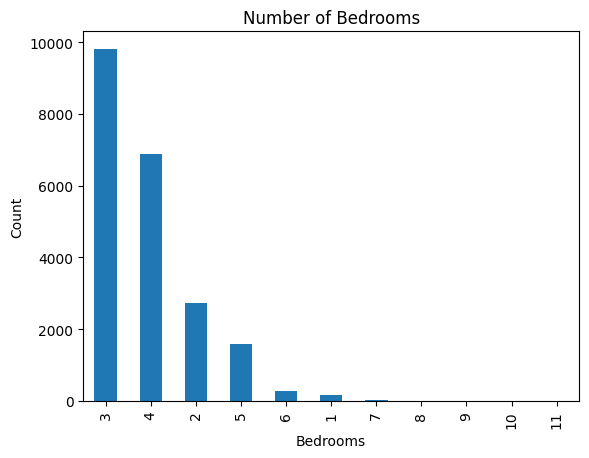

In [49]:
data['bedrooms'].value_counts().plot(kind = 'bar')
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.title("Number of Bedrooms")

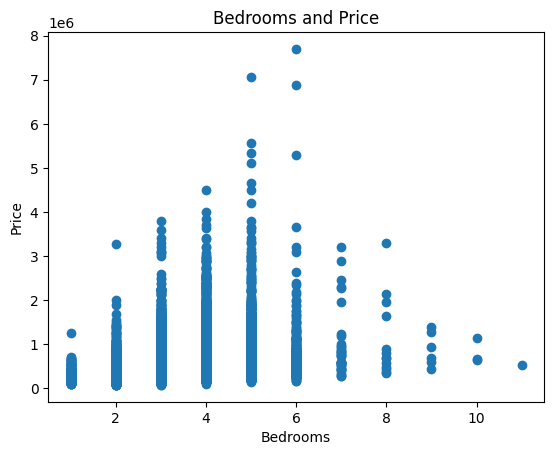

In [50]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedrooms and Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

Text(0.5, 1.0, 'Number of Bathrooms')

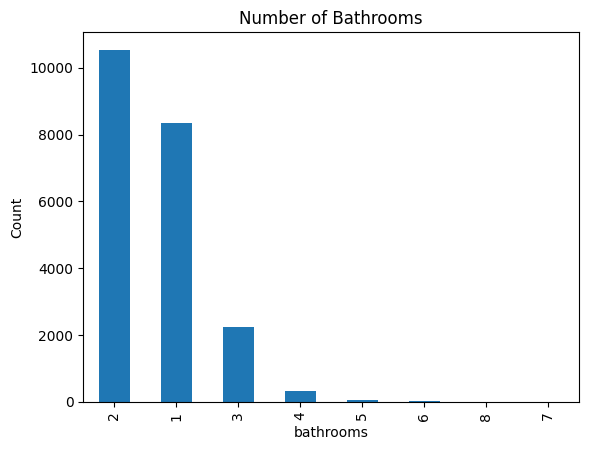

In [51]:
data['bathrooms'].value_counts().plot(kind = 'bar')
plt.xlabel("bathrooms")
plt.ylabel("Count")
plt.title("Number of Bathrooms")

Text(0.5, 1.0, 'Price Vs Square feet')

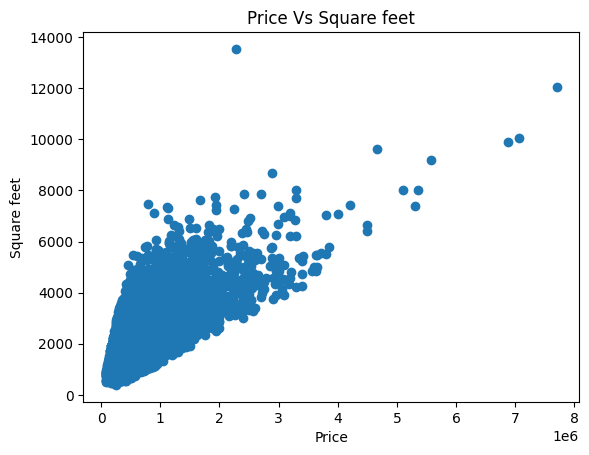

In [52]:
plt.scatter(data.price,data.sqft_living)
plt.xlabel("Price")
plt.ylabel("Square feet")
plt.title("Price Vs Square feet")

Text(0.5, 1.0, 'Number of floors')

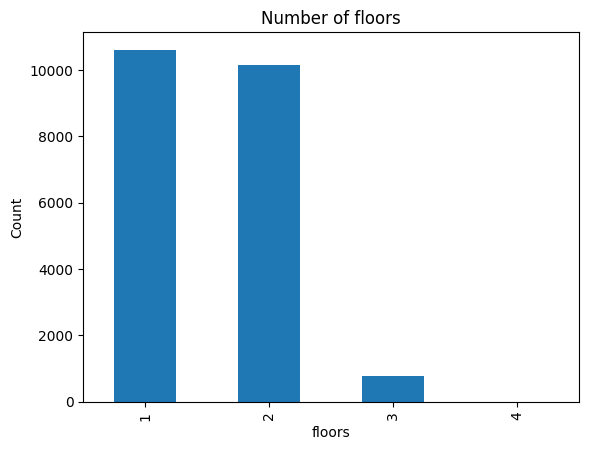

In [53]:
data['floors'].value_counts().plot(kind = 'bar')
plt.xlabel("floors")
plt.ylabel("Count")
plt.title("Number of floors")

Text(0.5, 1.0, 'Waterfront Vs Prices (0 = No Waterfront)')

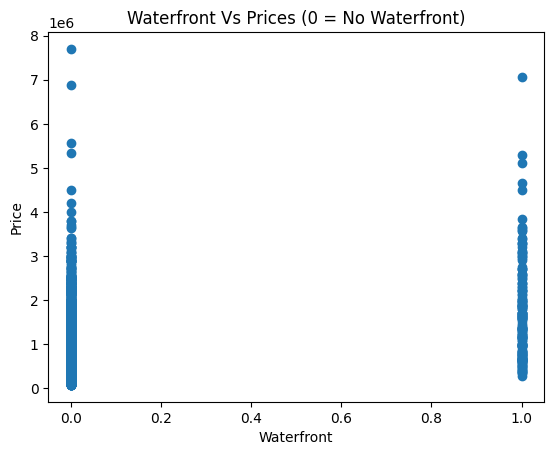

In [54]:
plt.scatter(data.waterfront,data.price)
plt.xlabel("Waterfront")
plt.ylabel("Price")
plt.title("Waterfront Vs Prices (0 = No Waterfront)")

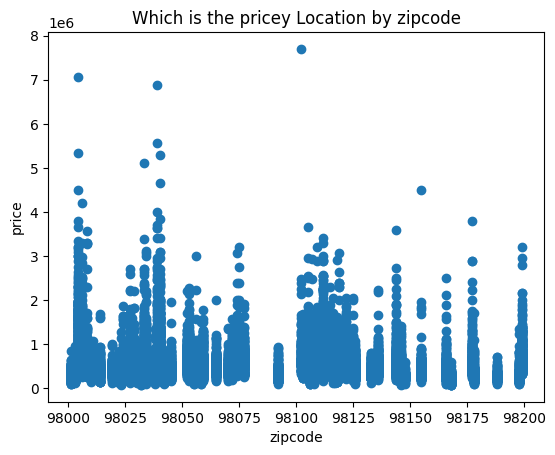

In [55]:
plt.scatter(data.zipcode,data.price)
plt.xlabel("zipcode")
plt.ylabel("price")
plt.title("Which is the pricey Location by zipcode")
plt.show()

In [56]:
data['price_per_sqfeet'] = (data['price'] * 100000/data['sqft_lot'])
data.head(100)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqfeet
0,221900.0,3,1,1180,5650,1,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650,3.927434e+06
1,538000.0,3,2,2570,7242,2,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639,7.428887e+06
2,180000.0,2,1,770,10000,1,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062,1.800000e+06
3,604000.0,4,3,1960,5000,1,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000,1.208000e+07
4,510000.0,3,2,1680,8080,1,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503,6.311881e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,905000.0,4,2,3300,10250,1,0,0,3,7,910,1946,1991,98040,47.5873,-122.249,1950,6045,8.829268e+06
96,247500.0,3,1,1960,15681,1,0,0,3,7,0,1967,0,98032,47.3576,-122.277,1750,15616,1.578343e+06
97,199000.0,4,1,1160,6400,1,0,0,4,7,0,1975,0,98023,47.3036,-122.378,1160,6400,3.109375e+06
98,314000.0,3,1,1810,41800,1,0,0,5,7,600,1980,0,98038,47.4109,-121.958,1650,135036,7.511962e+05


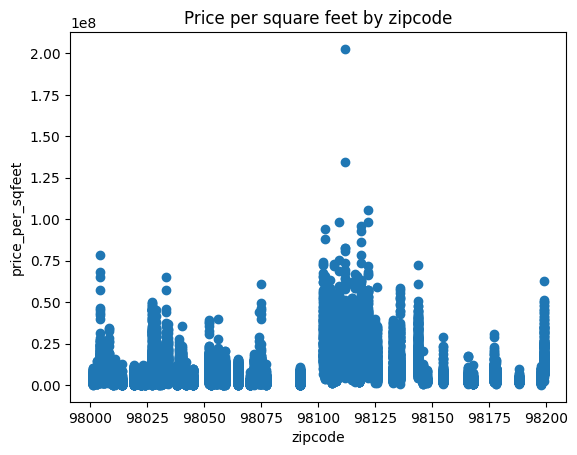

In [57]:
plt.scatter(data.zipcode,data.price_per_sqfeet)
plt.xlabel("zipcode")
plt.ylabel("price_per_sqfeet")
plt.title("Price per square feet by zipcode")
plt.show()

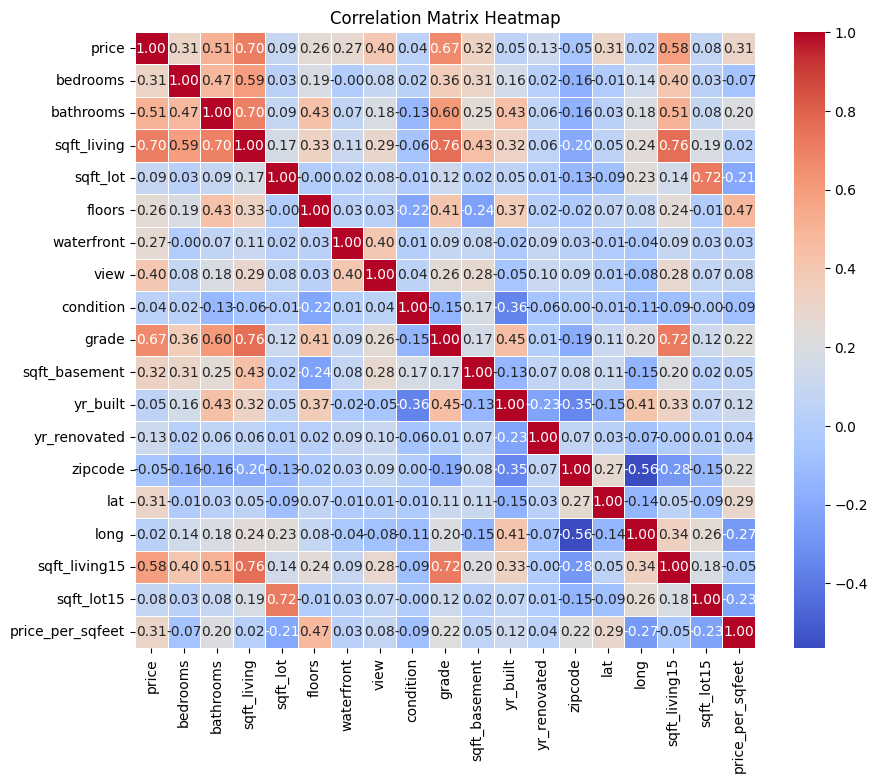

In [58]:
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Split the data into test and train data sets

In [66]:
X = data.drop(["price","sqft_lot","waterfront","view","condition","grade","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"], axis=1)
y = data["price"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)


reg = LinearRegression()
reg.fit(X_train, y_train)


pred = reg.predict(X_test)


r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)

print("R-squared:", r2)
print("Mean Absolute Error:", mae)


R-squared: 0.604946214226
Mean Absolute Error: 150641.4512396791


In [67]:
print("X_train Shape:",X_train.shape)
print("X_test Shape:",X_test.shape)
print("y_train Shape:",y_train.shape)
print("y_test Shape:",y_test.shape)

X_train Shape: (19369, 5)
X_test Shape: (2153, 5)
y_train Shape: (19369,)
y_test Shape: (2153,)


In [68]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
metrics.r2_score(y_test,pred)

0.6450110078838339

In [62]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
r2_score(y_test,pred)

0.44099388714220267

In [65]:
input =(1500,2,3,2,2000) #sqft_living,floors,bedrooms,bathrooms,price_per_sqfeet
np_array = np.asarray(input,dtype = float)
np_array = np_array.reshape(1,-1)
pred = xgb.predict(np_array)
print("House Price Prediction is:",pred)

House Price Prediction is: [296187.88]


In [64]:
import pickle
pickle.dump(xgb,open('akshay24.pkl','wb'))